#<center>**SỬ DỤNG MÔ HÌNH XXX VÀ YYY TÌM KIẾM VĂN BẢN TIẾNG ANH**
#<center>**Môn học:** Truy xuất thông tin
#<center>**Mã lớp:** CS419.N11
---
**Danh sách sinh viên thực hiện:**
1.  Phan Thanh Hải - 18520705
2. Nguyễn Hoàng Long - 20520239

**Lưu ý:**

*   Quy cách đặt tên các thành phần cơ bản của chương trình theo hướng dẫn sau đây: https://peps.python.org/pep-0008/.
*   Sử dụng tiếng Anh để đặt tên biến, tên hàm, v.v... Chỉ sử dụng tiếng Việt để comment, nếu cần.

# **1. Chèn các thư viện cần thiết**

In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [2]:
import os
import re
from natsort import natsorted
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
stemmer = SnowballStemmer("english")
sen = 'the boundary layer in simple shear flow past a flat plate . the boundary layer equations are presented for steady incompressible flow with no pressure gradient . '
for word in sen.split():
    stem_word = stemmer.stem(word)
    print(stem_word, end=' ')

the boundari layer in simpl shear flow past a flat plate . the boundari layer equat are present for steadi incompress flow with no pressur gradient . 

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Đọc dữ liệu**

In [7]:
'''
Input: chuỗi kí tự documents_path là đường dẫn tới thư mục chứa các tài liệu
Output: danh sách documents, trong đó mỗi phần tử của danh sách là toàn bộ chuỗi kí tự của tập tài liệu tương ứng
Ví dụ: documents = ['the specific configuration . the experiment . ',
                    'the discussion here is restricted . two dimensional incompressible steady flow .']
'''
def read_documents(documents_path):
    documents = []
    os.chdir(documents_path)
    # Use natsorted() for natural sorting of file names
    for file in natsorted(os.listdir()):
    # Check whether file is in text format or not
        if file.endswith(".txt"):
            file_path = f"{documents_path}/{file}"
            with open(file_path, 'r') as f:
                documents.append(f.read())    
    return documents

In [8]:
documents_path = '/content/drive/MyDrive/FOLDER MÔN HỌC/HK1(2022-2023)/CS419.N11 - Truy xuất thông tin/Bài tập/Cranfield'
documents = read_documents(documents_path)
print(documents[:5])

['experimental investigation of the aerodynamics of a wing in a slipstream . an experimental study of a wing in a propeller slipstream was made in order to determine the spanwise distribution of the lift increase due to slipstream at different angles of attack of the wing and at different free stream to slipstream velocity ratios .  the results were intended in part as an evaluation basis for different theoretical treatments of this problem . the comparative span loading curves, together with supporting evidence, showed that a substantial part of the lift increment produced by the slipstream was due to a /destalling/ or boundary layer control effect .  the integrated remaining lift increment, after subtracting this destalling lift, was found to agree well with a potential flow theory . an empirical evaluation of the destalling effects was made for the specific configuration of the experiment . ', "simple shear flow past a flat plate in an incompressible fluid of small viscosity . in th

In [9]:
'''
Input: chuỗi kí tự queries_path là đường dẫn tới tập tin chứa các câu truy vấn
Output: danh sách queries, trong đó mỗi phần tử của danh sách là toàn bộ chuỗi kí tự của câu truy vấn tương ứng
Ví dụ: queries = ['aeroelastic models of heated high speed aircraft .',
                  'with flight of high speed aircraft .']
'''
def read_queries(queries_path):
    with open(queries_path) as file:
        queries = file.readlines()
    # Mỗi dòng trong tập tin query.txt có cấu trúc [id]\t[câu truy vấn]
    # -> Ta lấy câu truy vấn bằng cách tách từng dòng bởi dấu \t và chỉ lấy phần sau sau dấu \t
    for idx in range(len(queries)):
        queries[idx] = queries[idx][:-1].split("\t")[1]
    return queries

In [10]:
queries_path = '/content/drive/MyDrive/FOLDER MÔN HỌC/HK1(2022-2023)/CS419.N11 - Truy xuất thông tin/Bài tập/TEST/query.txt'
queries = read_queries(queries_path)
print(queries[:5])

['what similarity laws must be obeyed when constructing aeroelastic models of heated high speed aircraft .', 'what are the structural and aeroelastic problems associated with flight of high speed aircraft .', 'what problems of heat conduction in composite slabs have been solved so far .', 'can a criterion be developed to show empirically the validity of flow solutions for chemically reacting gas mixtures based on the simplifying assumption of instantaneous local chemical equilibrium .', 'what chemical kinetic system is applicable to hypersonic aerodynamic problems .']


In [11]:
from nltk.tokenize import word_tokenize
question_words = ["what", "why", "when", "where", 
             "will", "is", "how", "do", "does", "did",
             "which", "are", "could", "would", "can", "can't",
             "should", "has", "have", "whom", "whose", "don't", "to what extent"]

for query in queries:
    temp = nltk.tokenize.word_tokenize(query)
    if any(x in temp[0] for x in question_words):
        continue
    else:
        print(query)

papers on internal /slip flow/ heat transfer studies .
papers on shock-sound wave interaction .
material properties of photoelastic materials .
papers on flow visualization on slender conical wings .
to find an approximate correction for thickness in slender thin-wing theory .
to what extent can the available information for incompressible boundary layers be applied to problems involving compressible boundary layers .
to what extent can readily available steady-state aerodynamic data be utilized to predict lifting-surface flutter characteristics .
can't the static deflection shapes be used in predicting flutter in place of vibrational shapes . if so,  can we provide a justification by means of an example .
previous solutions to the boundary layer similarity equations .
experimental results on hypersonic viscous interaction .
references on the methods available for accurately estimating aerodynamic heat transfer to conical bodies for both laminar and turbulent flow .
recent data on shoc

In [12]:
queries[0][:-2]

'what similarity laws must be obeyed when constructing aeroelastic models of heated high speed aircraft'

In [ ]:
is_question('queries[0][:-2]')

NameError: ignored

In [13]:
'''
Input: chuỗi kí tự relevance_path là đường dẫn tới thư mục chứa kết quả truy vấn đúng
Output: từ điển relevance, trong đó:
+ thành phần khóa là id của câu truy vấn
+ thành phần value là danh sách id của tập tài liệu tương ứng với kết quả truy vấn đúng dựa trên id của câu truy vấn trên
Ví dụ: relevance = {1: [1, 2, 3]
                    2: [3, 4]}
'''
def read_relevance(relevance_path):
    relevance = {}
    os.chdir(relevance_path)
    idx = 1
    # Use natsorted() for natural sorting of file names
    for file in natsorted(os.listdir()):
    # Check whether file is in text format or not
        if file.endswith(".txt"):
            file_path = f"{relevance_path}/{file}"
            with open(file_path, 'r') as f:
                line = f.readlines()
                relevance[idx] = []
                for li in line:
                    temp = re.split(r"[ \t\n]\s*", li)
                    relevance[idx].append(int(temp[1]))
        idx += 1
    return relevance

In [14]:
relevance_path = '/content/drive/MyDrive/FOLDER MÔN HỌC/HK1(2022-2023)/CS419.N11 - Truy xuất thông tin/Bài tập/TEST/RES'
relevance = read_relevance(relevance_path)
print(relevance)

{1: [184, 29, 31, 12, 51, 102, 13, 14, 15, 57, 378, 859, 185, 30, 37, 52, 142, 195, 875, 56, 66, 95, 462, 497, 858, 876, 879, 880, 486], 2: [12, 15, 184, 858, 51, 102, 202, 14, 52, 380, 746, 859, 948, 285, 390, 391, 442, 497, 643, 856, 857, 877, 864, 658, 486], 3: [5, 6, 90, 91, 119, 144, 181, 399, 485], 4: [236, 166, 488], 5: [552, 401, 1297, 1296, 488], 6: [99, 115, 257, 258, 491], 7: [20, 56, 57, 58, 19, 492], 8: [48, 122, 20, 58, 196, 354, 360, 197, 999, 1112, 1005, 492], 9: [21, 22, 550, 534], 10: [259, 405, 302, 436, 437, 438, 998, 1011, 493], 11: [27, 28, 262, 160, 20, 263, 654, 495], 12: [86, 194, 650, 649, 652, 624], 13: [64, 265, 65, 311, 496], 14: [64, 65, 496], 15: [463, 462, 497], 16: [266, 106, 196, 498], 17: [106, 196, 498], 18: [196, 197, 198, 498], 19: [32, 67, 164, 639, 715, 716, 719, 1379, 717, 499], 20: [87, 88, 104, 267, 268, 269, 270, 407, 408, 500], 21: [271, 16, 413, 414, 502], 22: [68, 502], 23: [900, 902, 200, 201, 601, 899, 903, 593, 199, 594, 901, 544, 597, 

# **3. Thống kê mục từ**

Ta sẽ xây dựng cấu trúc dữ liệu để biểu diễn thông tin mục từ của tài liệu.
*word_lst*: từ điển lưu trữ thông tin của các mục từ bao gồm nội dung chuỗi kí tự, chỉ số tài liệu và tần số xuất hiện trong tài liệu tương ứng theo cấu trúc sau:

```
word_lst = {
[mục từ 1]: { [chỉ số tài liệu 1]: [tần số],
	          [chỉ số tài liệu 2]: [tần số],
	        … }
[mục từ 2]: { [chỉ số tài liệu 1]: [tần số],
	          [chỉ số tài liệu 2]: [tần số],
	        … }
… }
```




In [15]:
'''
Hàm này dùng để cập nhật thông tin của các mục từ trong từ điển word_lst
# Input:
# + id: id của câu
# + term: term của tài liệu
# + word_lst: từ điển word_lst chứa thông tin
# Output: từ điển word_lst sau khi đã khi đã cập nhật thông tin term
'''
def update_word_lst(id, word, word_lst):
    if word in word_lst:
        if id in word_lst[word]:
            # Cập nhật tần số xuất hiện của từ đó lên 1
            word_lst[word][id] += 1
        else:
            # Thêm chỉ số tài liệu và tần số = 1 tương ứng với mục từ mới
            word_lst[word][id] = 1
    else:
        # Thêm mục từ mới vào trong word_lst và chỉ số tài liệu, tần số = 1 tương ứng
        word_lst[word] = {id: 1}
    return word_lst

In [16]:
# Hàm này dùng để phân tách mục từ từ 1 câu
def create_words(sentence):
    words = [] 
    # Remove punctuation and numbers. Split on whitespace
    regex = r"[ .,()0123456789=:+-/']\s*"
    words = re.split(regex, sentence)
    # Use filter(None, ) to remove empty element after splitting string
    words = filter(None, words)
    return words

In [17]:
def create_vocab_lst(inverted_index):
    vocab_lst = {}
    for term in inverted_index:
        freq = len(inverted_index[term])
        no_of_docs = sum(inverted_index[term].values())
        vocab_lst[term] = [freq, no_of_docs]
    return vocab_lst

In [18]:
# Hàm này dùng để cập nhật thông tin toàn bộ mục từ của 1 câu trong từ điển word_lst
def create_word_lst(id, sentence, word_lst):
    words = create_words(sentence)
    for word in words:
        # Update word in word_lst
        word_lst = update_word_lst(id, word, word_lst)
    return word_lst

In [19]:
word_lst = {}
idx = 1
for document in documents:
    word_lst = create_word_lst(idx, document, word_lst)
    idx += 1
print(word_lst)

{'experimental': {1: 2, 11: 1, 12: 1, 17: 1, 19: 1, 25: 1, 29: 1, 30: 1, 35: 1, 41: 1, 42: 1, 47: 1, 52: 1, 53: 1, 58: 1, 69: 1, 70: 1, 74: 1, 78: 1, 84: 2, 99: 2, 101: 1, 103: 1, 112: 1, 115: 1, 121: 1, 123: 2, 137: 1, 140: 1, 142: 1, 154: 1, 156: 1, 168: 1, 170: 1, 171: 1, 173: 2, 176: 1, 179: 2, 183: 1, 184: 1, 186: 2, 187: 1, 188: 1, 189: 1, 191: 1, 195: 3, 197: 2, 202: 1, 203: 1, 206: 2, 207: 2, 212: 1, 216: 1, 220: 1, 222: 1, 225: 1, 227: 1, 230: 1, 234: 4, 245: 1, 251: 1, 256: 2, 257: 1, 262: 1, 271: 2, 273: 1, 277: 1, 282: 1, 283: 1, 286: 1, 294: 1, 295: 1, 304: 1, 307: 1, 329: 2, 330: 1, 334: 2, 338: 1, 339: 1, 344: 2, 345: 1, 346: 2, 347: 1, 354: 1, 360: 1, 369: 1, 370: 1, 372: 2, 377: 1, 397: 1, 409: 1, 411: 2, 413: 2, 418: 1, 420: 1, 421: 1, 423: 1, 427: 1, 435: 1, 439: 1, 441: 1, 442: 2, 453: 1, 455: 2, 462: 1, 464: 1, 467: 1, 484: 3, 494: 2, 496: 1, 497: 1, 498: 1, 501: 1, 503: 1, 504: 1, 505: 1, 511: 1, 518: 1, 520: 2, 522: 3, 536: 1, 540: 1, 544: 2, 549: 1, 552: 2, 553:

In [20]:
print(word_lst.keys())

dict_keys(['experimental', 'investigation', 'of', 'the', 'aerodynamics', 'a', 'wing', 'in', 'slipstream', 'an', 'study', 'propeller', 'was', 'made', 'order', 'to', 'determine', 'spanwise', 'distribution', 'lift', 'increase', 'due', 'at', 'different', 'angles', 'attack', 'and', 'free', 'stream', 'velocity', 'ratios', 'results', 'were', 'intended', 'part', 'as', 'evaluation', 'basis', 'for', 'theoretical', 'treatments', 'this', 'problem', 'comparative', 'span', 'loading', 'curves', 'together', 'with', 'supporting', 'evidence', 'showed', 'that', 'substantial', 'increment', 'produced', 'by', 'destalling', 'or', 'boundary', 'layer', 'control', 'effect', 'integrated', 'remaining', 'after', 'subtracting', 'found', 'agree', 'well', 'potential', 'flow', 'theory', 'empirical', 'effects', 'specific', 'configuration', 'experiment', 'simple', 'shear', 'past', 'flat', 'plate', 'incompressible', 'fluid', 'small', 'viscosity', 'high', 'speed', 'viscous', 'two', 'dimensional', 'body', 'it', 'is', 'usua

## **Phân tích tập tài liệu**

In [21]:
doc_info = [0] * 1401
for word in word_lst:
    for ele in word_lst[word]:
        doc_info[ele] += word_lst[word][ele]

In [22]:
print(doc_info)

[0, 139, 197, 25, 77, 54, 103, 215, 165, 308, 53, 104, 125, 139, 372, 138, 139, 140, 126, 62, 164, 60, 85, 138, 263, 377, 61, 134, 156, 245, 113, 34, 177, 269, 178, 149, 139, 161, 82, 160, 152, 70, 262, 147, 281, 161, 86, 199, 120, 393, 150, 201, 176, 201, 216, 139, 213, 168, 169, 228, 141, 132, 282, 133, 139, 81, 166, 86, 111, 130, 208, 79, 256, 332, 81, 111, 201, 344, 196, 158, 288, 115, 309, 298, 168, 279, 112, 114, 143, 429, 104, 157, 198, 88, 469, 114, 263, 232, 68, 298, 227, 323, 75, 125, 120, 171, 67, 89, 108, 171, 329, 109, 142, 110, 191, 190, 160, 134, 146, 75, 103, 137, 225, 236, 214, 210, 121, 123, 158, 243, 89, 361, 340, 213, 203, 191, 87, 45, 228, 139, 359, 87, 102, 60, 138, 134, 239, 160, 144, 277, 174, 300, 186, 61, 83, 262, 266, 244, 139, 101, 376, 50, 195, 375, 290, 374, 192, 125, 248, 131, 253, 166, 228, 298, 277, 69, 110, 221, 69, 268, 62, 47, 114, 147, 145, 295, 187, 269, 235, 335, 161, 205, 202, 398, 64, 168, 172, 259, 280, 348, 112, 182, 300, 66, 180, 257, 288, 20

In [23]:
doc_df = pd.DataFrame(doc_info, columns=['len_of_doc'])

In [24]:
print(doc_df)

      len_of_doc
0              0
1            139
2            197
3             25
4             77
...          ...
1396         109
1397          76
1398         205
1399          78
1400         101

[1401 rows x 1 columns]


In [25]:
doc_df[doc_df['len_of_doc'] > 500]

,len_of_doc
329,636
721,502
798,655
1040,503
1201,573
1313,653


In [26]:
doc_df[doc_df['len_of_doc'] < 20]

,len_of_doc
0,0
471,0
995,0


## Kiểm chứng các law trong ngôn ngữ

In [27]:
word_info_lst = create_vocab_lst(word_lst)

In [28]:
print('Số lượng mục từ có trong toàn bộ tập tài liệu là:', len(word_info_lst))

Số lượng mục từ có trong toàn bộ tập tài liệu là: 7052


In [29]:
word_info = []
for word in word_info_lst:
    word_info.append([word, word_info_lst[word][1]])

In [30]:
word_df = pd.DataFrame(word_info, columns = ['word', 'freq'])
word_df = word_df.sort_values(by=['freq'], ascending=False)

In [31]:
print(word_df)

         word   freq
3         the  19444
2          of  12671
26        and   6149
5           a   5923
7          in   4647
...       ...    ...
4736  acquire      1
4737  frontal      1
4741   hansen      1
4742   liable      1
7051       ob      1

[7052 rows x 2 columns]


## **Thống kê từ vựng**

In [32]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate_from_frequencies(data)

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

In [33]:
word_dict = {}
for a, x in word_df.values:
    word_dict[a] = x

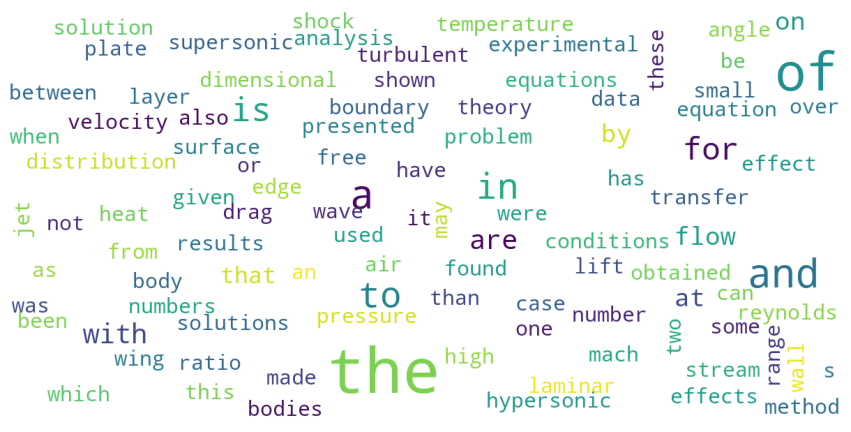

In [34]:
show_wordcloud(word_dict)

In [35]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [36]:
stopword_df = word_df[word_df['word'].isin(stopwords.words('english'))]
non_stopword_df = word_df[~word_df['word'].isin(stopwords.words('english'))]

In [37]:
print(non_stopword_df)

          word  freq
71        flow  1852
159   pressure  1216
59    boundary  1187
60       layer  1032
267     number   974
...        ...   ...
4736   acquire     1
4737   frontal     1
4741    hansen     1
4742    liable     1
7051        ob     1

[6933 rows x 2 columns]


In [38]:
non_stopword_dict = {}
for a2, x2 in non_stopword_df.values:
    non_stopword_dict[a2] = x2

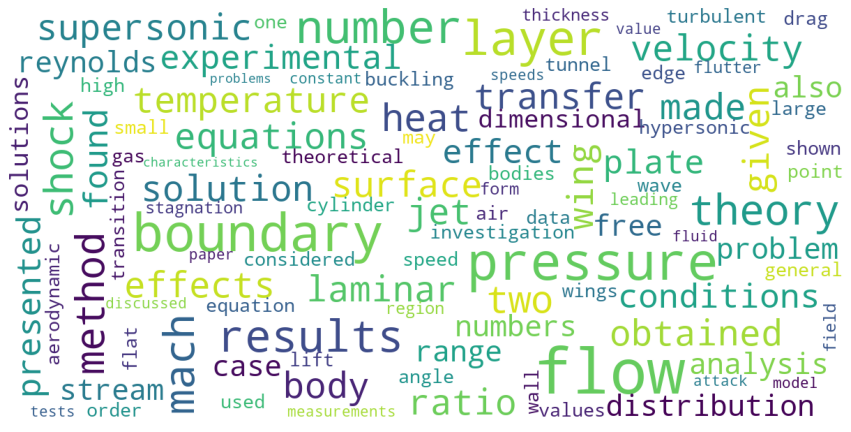

In [39]:
show_wordcloud(non_stopword_dict)

In [40]:
plt.rcParams.update({'font.size': 14})

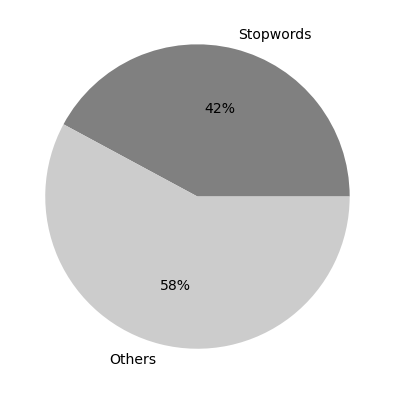

In [41]:
# Creating dataset
cars = ['Stopwords', 'Others']
 
data = [sum(stopword_df['freq']), sum(word_df['freq']) - sum(stopword_df['freq'])]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = cars, autopct='%1.0f%%', colors = ['0.5', '0.8'])
 
# show plot
plt.show()

## Brevity law

Định luật ngắn gọn của Zipf, được đề xuất vào năm 1945 bởi nhà ngôn ngữ học George Zipf, cho rằng từ càng xuất hiện thường xuyên có xu hướng có độ dài ngắn hơn; và ngược lại, từ càng được ít sử dụng có xu hướng có độ dài dài hơn.

In [42]:
word_dff = word_df.copy()
len_word_lst = []
for cai_gi_do in word_dff['word']:
    len_word_lst.append(len(cai_gi_do))
word_dff['len_of_word'] = len_word_lst
word_dff

,word,freq,len_of_word
3,the,19444,3
2,of,12671,2
26,and,6149,3
5,a,5923,1
7,in,4647,2
...,...,...,...
4736,acquire,1,7
4737,frontal,1,7
4741,hansen,1,6
4742,liable,1,6


In [43]:
len_of_word_lst = word_dff.groupby('len_of_word')['freq'].sum()
len_of_word_lst

len_of_word
1      7395
2     37642
3     38955
4     28083
5     21793
6     16973
7     16959
8     18413
9     12889
10     9436
11     6791
12     4228
13     1963
14      865
15      407
16       17
17       12
18       16
19       29
20        4
21        3
Name: freq, dtype: int64

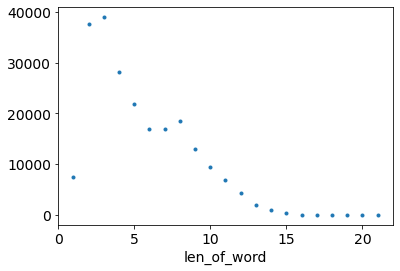

In [ ]:

len_of_word_lst.plot(style='.')

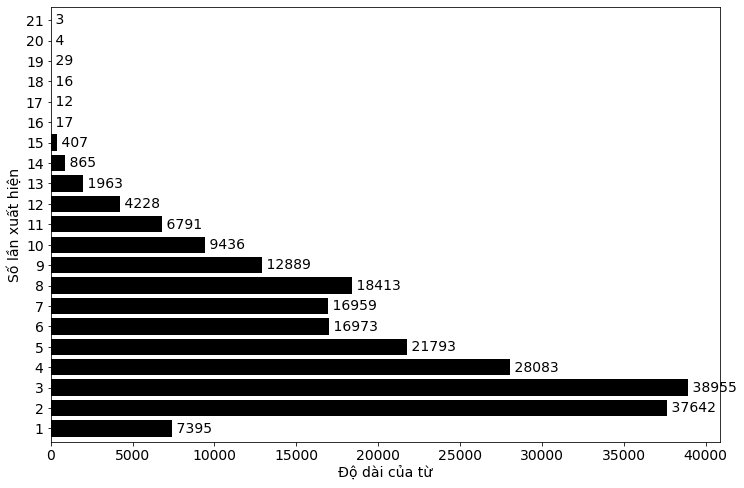

In [ ]:
fig = plt.figure(figsize = (12, 8))
 
# creating the bar plot
len_of_word_lst.plot.barh(color ='k', width=0.8)
 
plt.xlabel("Độ dài của từ")
plt.ylabel("Số lần xuất hiện")
for index, value in enumerate(len_of_word_lst):
    plt.text(value, index, ' ' + str(value), va='center')
plt.show()

Từ có độ dài là 3 xuất hiện với tần số nhiều nhất. Từ có độ dài là 21 xuất hiện với tần số ít nhất.

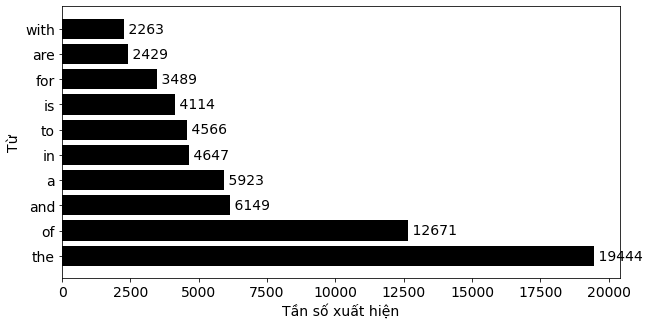

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.barh(word_df.head(10)['word'], word_df.head(10)['freq'], color ='k')
 
plt.ylabel("Từ")
plt.xlabel("Tần số xuất hiện")
for index, value in enumerate(word_df.head(10)['freq']):
    plt.text(value, index, ' ' + str(value), va='center')
plt.show()

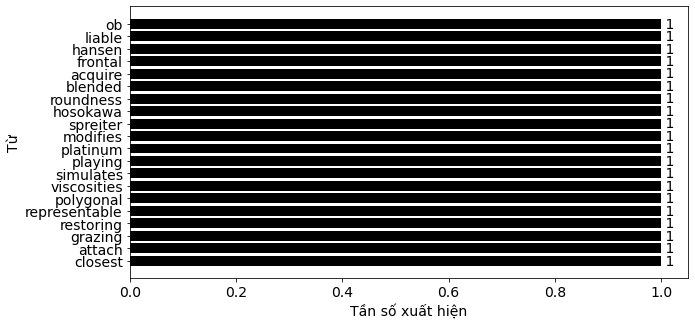

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.barh(word_df.tail(20)['word'], word_df.tail(20)['freq'], color ='k')
 
plt.ylabel("Từ")
plt.xlabel("Tần số xuất hiện")
for index, value in enumerate(word_df.tail(20)['freq']):
    plt.text(value, index, ' ' + str(value), va='center')
plt.show()

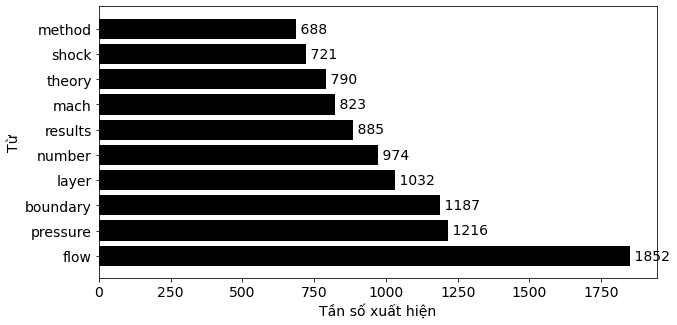

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.barh(non_stopword_df.head(10)['word'], non_stopword_df.head(10)['freq'], color ='k')
 
plt.ylabel("Từ")
plt.xlabel("Tần số xuất hiện")
for index, value in enumerate(non_stopword_df.head(10)['freq']):
    plt.text(value, index, ' ' + str(value), va='center')
plt.show()

In [44]:
len_non_stopword_lst = []
for gi_do in non_stopword_df['word']:
    len_non_stopword_lst.append(len(gi_do))
non_stopword_df['len_of_word'] = len_non_stopword_lst

<ipython-input-44-7463995dd1f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_stopword_df['len_of_word'] = len_non_stopword_lst


In [45]:
print(non_stopword_df)

          word  freq  len_of_word
71        flow  1852            4
159   pressure  1216            8
59    boundary  1187            8
60       layer  1032            5
267     number   974            6
...        ...   ...          ...
4736   acquire     1            7
4737   frontal     1            7
4741    hansen     1            6
4742    liable     1            6
7051        ob     1            2

[6933 rows x 3 columns]


In [46]:
len_of_word_lst = non_stopword_df.groupby('len_of_word')['freq'].sum()
len_of_word_lst

len_of_word
1       889
2       270
3      4300
4     16927
5     18596
6     16678
7     16246
8     18413
9     12889
10     9435
11     6791
12     4228
13     1963
14      865
15      407
16       17
17       12
18       16
19       29
20        4
21        3
Name: freq, dtype: int64

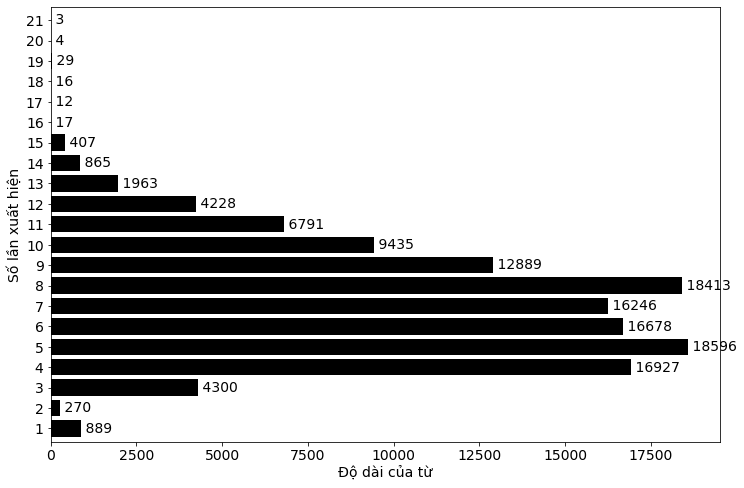

In [47]:
fig = plt.figure(figsize = (12, 8))
 
# creating the bar plot
len_of_word_lst.plot.barh(color ='k', width=0.8)
 
plt.xlabel("Độ dài của từ")
plt.ylabel("Số lần xuất hiện")
for index, value in enumerate(len_of_word_lst):
    plt.text(value, index, ' ' + str(value), va='center')
plt.show()

In [49]:
sum = 0
for len_of_word in len_of_word_lst.index:
    sum += len_of_word*len_of_word_lst[len]
avg_len = sum / np.sum(len_of_word_lst)

In [50]:
print('Độ dài từ trung bình có trong tài liệu là:', avg_len)

Độ dài từ trung bình có trong tài liệu là: 0.005373009350431857


In [58]:
pd.set_option('display.max_rows', None)
non_stopword_df[non_stopword_df['len_of_word'].isin([1])]

,word,freq,len_of_word
316,x,156,1
621,e,101,1
414,r,73,1
2174,n,71,1
1525,f,56,1
318,h,56,1
310,k,51,1
947,c,46,1
2307,p,45,1
306,u,41,1


In [ ]:
non_stopword_df[non_stopword_df['word'] == 'vii']

,word,freq,len_of_word
5209,vii,1,3


# **4. Xác định term**

*Terms* của tài liệu được xác định theo các bước như sau:

**Bước 1.** Ngắt các token trong tài liệu bởi dấu cách.

**Bước 2.** Với mỗi token:
*   **Bước 2.1.** Loại bỏ các kí tự dấu câu và các chữ số.
*   **Bước 2.2.** Loại bỏ các token là *stopwords* trong tài liệu.
*   **Bước 2.3.** Sử dụng kĩ thuật *stemming* để lấy từ gốc trong câu.
*   **Bước 2.4.** Loại bỏ những từ gốc chỉ có chứa 3 kí tự.

Kết quả sau **bước 2** cho ta danh sách các *terms* của tài liệu.

Ta sẽ xây dựng cấu trúc dữ liệu để biểu diễn thông tin mục từ của tài liệu.
*inverted_indext*: từ điển lưu trữ thông tin của các *terms* bao gồm nội dung chuỗi kí tự, chỉ số tài liệu và tần số xuất hiện trong tài liệu tương ứng theo cấu trúc sau:

```
inverted_index = {
[term 1]: { [chỉ số tài liệu 1]: [tần số],
	        [chỉ số tài liệu 2]: [tần số],
	       … }
[term 2]: { [chỉ số tài liệu 1]: [tần số],
	        [chỉ số tài liệu 2]: [tần số],
	      … }
… }
```

In [ ]:
'''
Hàm này dùng để cập nhật thông tin của các mục từ trong từ điển inverted_file
# Input:
# + id: id của câu
# + term: term của tài liệu
# + inverted_index: từ điển inverted_index chứa thông tin
# Output: từ điển inverted_index sau khi đã khi đã cập nhật thông tin term
'''
def update_inverted_index(id, term, inverted_index):
    if term in inverted_index:
        if id in inverted_index[term]:
            inverted_index[term][id] += 1
        else:
            inverted_index[term][id] = 1
    else:
        inverted_index[term] = {id: 1}
    return inverted_index

In [ ]:
# Hàm này dùng để phân tách term từ 1 câu
def create_terms(sentence):
    terms = []
    # Remove punctuation and numbers. Split on whitespace
    regex = r"[ .,()0123456789=:+-/']\s*"
    word_lst = re.split(regex, sentence)
    # Use filter(None, ) to remove empty element after splitting string
    word_lst = filter(None, word_lst)
    for word in word_lst:
        # Remove stopwords
        stopword_lst = stopwords.words('english')
        if word in stopword_lst:
            continue
        # Perform stemming
        stemmer = SnowballStemmer("english")
        stem_word = stemmer.stem(word)
        # Remove 1 character
        #if len(stem_word) < 3:
        #    continue
        terms.append(stem_word)
    return terms

In [ ]:
# Hàm này dùng để cập nhật thông tin toàn bộ terms của 1 câu trong từ điển inverted_index
# Input:
# + id: id của câu
# + term: term của tài liệu
# + inverted_index: từ điển inverted_index chứa thông tin
# Output: từ điển inverted_index sau khi đã khi đã cập nhật thông tin toàn bộ terms
def create_inverted_index(id, sentence, inverted_index):
    terms = create_terms(sentence)
    for term in terms:
        # Update term in inverted_index
        inverted_index = update_inverted_index(id, term, inverted_index)
    return inverted_index

In [ ]:
inverted_index = {}
idx = 1
for document in documents:
    inverted_index = create_inverted_index(idx, document, inverted_index)
    idx += 1
print(inverted_index)

{'experiment': {1: 2, 11: 1, 12: 1, 16: 1, 17: 1, 19: 1, 25: 1, 29: 1, 30: 2, 35: 1, 37: 1, 41: 1, 42: 1, 43: 1, 47: 1, 52: 1, 53: 1, 58: 1, 69: 1, 70: 1, 74: 1, 78: 2, 84: 2, 99: 2, 101: 1, 103: 1, 112: 1, 115: 1, 121: 1, 123: 3, 131: 1, 137: 1, 140: 1, 142: 1, 154: 1, 156: 1, 167: 1, 168: 1, 170: 1, 171: 2, 173: 2, 176: 1, 179: 2, 183: 1, 184: 1, 186: 3, 187: 1, 188: 1, 189: 1, 191: 1, 195: 3, 197: 2, 202: 1, 203: 1, 206: 2, 207: 2, 212: 1, 216: 1, 220: 1, 222: 1, 225: 2, 227: 1, 230: 1, 234: 4, 245: 1, 251: 1, 256: 2, 257: 1, 262: 1, 271: 2, 273: 1, 277: 1, 282: 1, 283: 1, 286: 1, 287: 1, 289: 1, 294: 1, 295: 1, 304: 1, 307: 1, 329: 2, 330: 2, 334: 2, 338: 1, 339: 1, 344: 2, 345: 1, 346: 3, 347: 1, 354: 1, 360: 1, 369: 1, 370: 1, 372: 2, 377: 1, 397: 1, 409: 1, 411: 2, 413: 2, 418: 1, 420: 1, 421: 1, 423: 1, 427: 1, 433: 1, 435: 1, 439: 1, 441: 2, 442: 3, 443: 1, 453: 1, 455: 2, 462: 1, 464: 1, 467: 1, 484: 3, 494: 2, 496: 1, 497: 1, 498: 1, 501: 1, 503: 1, 504: 1, 505: 1, 511: 1, 5

# **5. Lập chỉ mục**

In ra màn hình danh sách tập từ vựng, trong đó mỗi dòng có định dạng: 

```
<term> <số lượng tài liệu chứa term> <tần số>
```



In [ ]:
vocab_lst = create_vocab_lst(inverted_index)

In [ ]:
chung_chung = []
for term in vocab_lst:
    chung_chung.append([term, vocab_lst[term][1]])

In [ ]:
term_df = pd.DataFrame (chung_chung, columns = ['term', 'freq'])
term_df = term_df.sort_values(by=['freq'], ascending=False)

In [ ]:
print(term_df)

           term  freq
53         flow  2083
116     pressur  1391
196      number  1348
42     boundari  1216
43        layer  1164
...         ...   ...
2899      today     1
2896   equilibr     1
2894  minnesota     1
2893      pursu     1
4146        ing     1

[4147 rows x 2 columns]


In [ ]:
term_dict = {}
for a, x in term_df.values:
    term_dict[a] = x

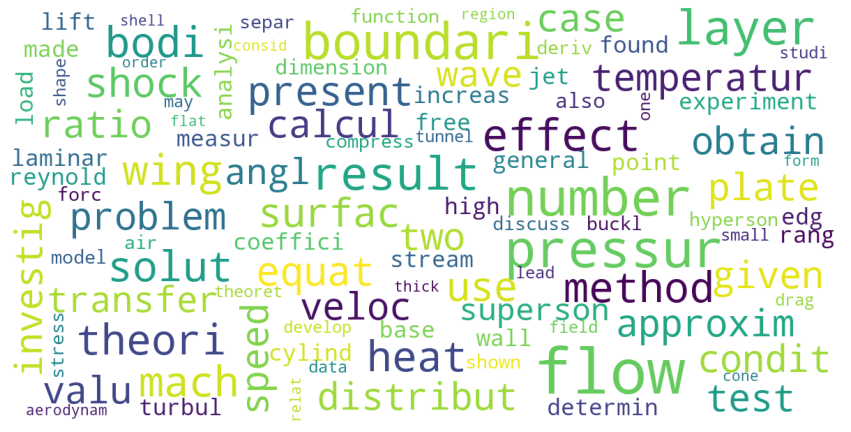

In [ ]:
show_wordcloud(term_dict)

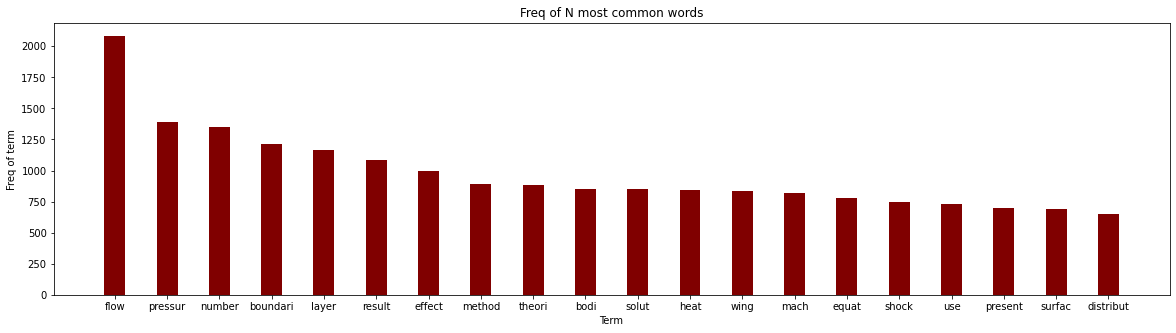

In [ ]:
fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(df.head(20)['term'], df.head(20)['freq'], color ='maroon', width = 0.4)
 
plt.xlabel("Term")
plt.ylabel("Freq of term")
plt.title("Freq of N most common words")
plt.show()

In [ ]:
len_lst = []
for gi_do in df['term']:
    len_lst.append(len(gi_do))
df['len_of_term'] = len_lst

In [ ]:
print(df)

           term  freq  len_of_term
53         flow  2083            4
116     pressur  1391            7
196      number  1348            6
42     boundari  1216            8
43        layer  1164            5
...         ...   ...          ...
2899      today     1            5
2896   equilibr     1            8
2894  minnesota     1            9
2893      pursu     1            5
4146        ing     1            3

[4147 rows x 3 columns]


In [ ]:
df['len_of_term'].value_counts()

6     863
5     736
7     720
4     554
8     494
9     285
3     197
10    136
11     81
12     31
13     23
14     14
15      7
17      2
16      2
19      1
18      1
Name: len_of_term, dtype: int64

In [ ]:
print(df)

In [ ]:
print('Số lượng terms có trong toàn bộ tập tài liệu là:', len(inverted_index))

Số lượng terms có trong toàn bộ tập tài liệu là: 4147


In ra màn hình danh sách posting, trong đó mỗi dòng có định dạng: 

```
<term> <chỉ số tài liệu> <tần số>
```


In [ ]:
res_path = '/content/drive/MyDrive/FOLDER MÔN HỌC/HK1(2022-2023)/CS419.N11 - Truy xuất thông tin/Bài tập/posting_lst.txt'
with open(res_path, 'w') as file:
    for term in inverted_index:
        idx = 1
        for id in inverted_index[term]:
            string = term + ' ' + str(id) + ' ' + str(inverted_index[term][id]) + '\n'
            file.write(string)